This script describes genotype calling and caQTL analysis of the pdCRE-mediated candidate pcSNPs identified in the previous step.

As a start, you need to download the processed genotype data (plink files) from the GEO database under accession number GSE170763. The download link is https://ftp.ncbi.nlm.nih.gov/geo/series/GSE170nnn/GSE170763/suppl/GSE170763%5Fplink%5Ffiles.tar.gz. Also, install the PLINK software on your device to call SNPs.

# Call candidate pcSNPs mediated by pdCREs

Prepare the SNP list, and run the following code using the command line (we used a windows PC):

plink --bfile E:\Seafile\scRegulate\T2D\genotype\plink_files\islets --extract ./T2D/snps_peak.txt --recode --out ./T2D/T2D_peaks

After running, we got three files including "T2D_peaks.map" (called SNPs) and "T2D_peaks.ped" (genotypes of the called SNPs) under our assigned directory, while were used in the following analysis.

# caQTL analysis on the called SNPs

In [1]:
library(MatrixEQTL)
library(dplyr)
library(ggplot2)
setwd('/nfs/public/xixi/scRegulate/T2D/predict_status/interpret/GWAS')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df_gwas_hg19 <- read.csv('/nfs/public/xixi/scRegulate/GWAS/GWAS_T2D_hg19_UCSC.csv')
df_gwas_hg19

chrom,chromStart,chromEnd,name,ref,altCount,alts,shiftBases,freqSourceCount,minorAlleleFreq,majorAllele,minorAllele,maxFuncImpact,class,ucscNotes,X_dataOffset,X_dataLen
<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>
chr1,183004333,183004334,rs4129858,A,1,"G,",0,12,"0.389377,-inf,0.373415,-inf,-inf,0.389496,-inf,0.38683,0.418526,0.434466,0.403333,0.462617,","A,,A,,,A,,A,A,A,A,G,","G,,G,,,G,,G,G,G,G,A,",1627,snv,"refIsMinor,diffMajor,commonSome,commonAll,overlapDiffClass,",45719110705,597
chr17,44083947,44083948,rs8067056,T,2,"C,G,",0,12,"0.309105,-inf,0.313989,-inf,-inf,0.298969,-inf,0.328571,0.386352,0.38835,0.288333,0.457547,","T,,T,,,T,,T,T,T,T,C,","C,,C,,,C,,C,C,C,C,T,",1627,snv,"refIsMinor,diffMajor,commonSome,commonAll,",61196737844,621
chr1,51438364,51438365,rs3176466,C,1,"T,",0,12,"0.155551,-inf,0.157612,-inf,-inf,0.141803,-inf,0.0589549,0.0889984,0.0884574,0.0933333,0.0518868,","C,,C,,,C,,C,C,C,C,C,","T,,T,,,T,,T,T,T,T,T,",1627,snv,"commonSome,commonAll,",44214763215,544
chr1,51457199,51457200,rs72906810,A,2,"C,G,",0,12,"0.0944489,-inf,0.1022,-inf,-inf,-inf,-inf,0.0575893,0.0889984,0.0884574,0.1,-inf,","A,,A,,,,,A,A,A,A,,","G,,G,,,,,G,G,G,G,,",0,snv,"commonSome,commonAll,",54243511620,398
chr1,51506885,51506886,rs12088739,A,1,"G,",0,12,"0.123802,-inf,0.131491,-inf,-inf,0.117386,-inf,0.0566964,0.0871821,0.0938511,0.103333,0.0327103,","A,,A,,,A,,A,A,A,A,A,","G,,G,,,G,,G,G,G,G,G,",0,snv,"commonSome,commonAll,overlapDiffClass,",11954641835,529
chr4,103895316,103895317,rs7659468,T,3,"A,C,G,",0,12,"0.438099,-inf,0.446037,-inf,-inf,0.462661,-inf,-inf,-inf,-inf,0.466667,0.400943,","G,,G,,,G,,,,,T,G,","T,,T,,,T,,,,,G,T,",1627,snv,"refIsMinor,diffMajor,commonSome,commonAll,",57961925722,487
chr6,32781111,32781112,rs2071479,C,1,"T,",0,12,"0.0169728,-inf,0.0211758,-inf,0.019479,0.0252902,-inf,0.0236607,0.0259471,0.0280475,0.05,0.00934579,","C,,C,,C,C,,C,C,C,C,C,","T,,T,,T,T,,T,T,T,T,T,",1627,snv,"commonSome,rareSome,",43696061556,525
chr20,10752609,10752610,rs6134031,C,1,"T,",0,12,"0.180911,-inf,0.197407,-inf,-inf,0.220841,-inf,0.282143,0.281007,0.272654,0.273333,0.0740741,","C,,C,,,C,,C,C,C,C,C,","T,,T,,,T,,T,T,T,T,T,",0,snv,"commonSome,commonAll,",53470866678,548
chr16,3583172,3583173,rs3751837,C,2,"A,T,",0,12,"0.222843,0.220202,0.231102,0.233613,-inf,0.232188,-inf,0.230804,-inf,-inf,0.258333,-inf,","C,C,C,C,,C,,C,,,C,,","T,T,T,T,,T,,T,,,T,,",1627,snv,"commonSome,commonAll,",45339624337,619


In [3]:
snps_peak <- read.table('T2D_peaks.map', sep = '\t')$V2
snps_peak

[1] "rs4655617"

In [4]:
df_x <- read.csv('/nfs/public/xixi/scRegulate/T2D/data/beta.atac.aggregate_30cells.csv', row.names = 1)
df_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V1385,V1386,V1387,V1388,V1389,V1390,V1391,V1392,V1393,V1394
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10-100001665-100002165,0.0000000,0.0000000,0.0000000,0.5656431,0.0000000,0.7415654,0.0000000,0.0000000,0.5202149,0.0000000,⋯,0.0000000,0.000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.6300102,0.000000
10-100002531-100003031,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.000000,0.0000000,0.5723721,0,0.0000000,0.0000000,0.0000000,0.0000000,0.000000
10-100003836-100004336,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.6300102,0.000000
10-100005433-100005933,0.4682107,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.6816064,0.000000,0.0000000,0.0000000,0,0.6583227,0.0000000,0.0000000,0.0000000,0.000000
10-100006548-100007048,0.4682107,0.4680396,0.0000000,0.5656431,0.0000000,0.0000000,0.0000000,0.0000000,0.5202149,0.7056186,⋯,0.0000000,0.000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0.000000
10-100013839-100014339,0.9364215,0.4680396,0.0000000,0.0000000,0.4846233,0.9357514,0.0000000,0.0000000,0.8245212,0.4451958,⋯,0.0000000,1.009967,0.9776367,0.5723721,0,1.0434168,0.0000000,0.9101129,0.0000000,0.000000
10-100018334-100018834,0.0000000,0.0000000,0.0000000,1.1312862,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.000000,0.0000000,0.5723721,0,0.0000000,0.0000000,0.0000000,0.0000000,1.291983
10-100019564-100020064,0.4682107,0.0000000,0.6274097,0.8965231,0.4846233,0.4678757,0.4758393,0.4610269,0.5202149,0.0000000,⋯,0.0000000,0.000000,0.0000000,0.0000000,0,0.6583227,0.0000000,0.0000000,0.0000000,0.000000
10-100020408-100020908,0.4682107,0.4680396,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.7056186,⋯,0.6816064,0.000000,0.0000000,0.0000000,0,0.6583227,0.0000000,0.0000000,0.0000000,0.000000


In [5]:
df_y <- read.csv('/nfs/public/xixi/scRegulate/T2D/data/beta.rna.aggregate_30cells.csv', row.names = 1)
df_y

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V1385,V1386,V1387,V1388,V1389,V1390,V1391,V1392,V1393,V1394
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WASH7P,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.4887908,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
RP11-34P13.7,0.5153061,0.4947104,0.0000000,0.6109117,0.4992003,0.0000000,0.5585006,0.0000000,0.0000000,0.5495145,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.1669522,0.0000000,0.000000,0.0000000
RP11-34P13.10,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
AL627309.1,0.5153061,0.4947104,0.0000000,0.9682721,0.0000000,0.9078881,0.5585006,0.5032808,0.5362918,0.5495145,⋯,0.0000000,0.0000000,0.7953575,0.0000000,0.0000000,0.0000000,0.7362648,0.7882645,0.505620,0.0000000
RP11-34P13.13,0.5153061,0.7840974,0.6291833,0.6109117,0.0000000,0.0000000,0.0000000,0.5032808,0.5362918,0.5495145,⋯,1.3093808,0.0000000,1.8467630,1.1349370,0.0000000,0.6660956,0.0000000,0.0000000,0.505620,0.0000000
RP11-34P13.9,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
AP006222.2,0.5153061,0.4947104,0.0000000,0.0000000,0.4992003,0.0000000,0.5585006,0.5032808,0.5362918,0.8709598,⋯,1.1278392,0.0000000,1.2606118,1.1349370,0.7503937,1.0557365,1.4725297,1.8302935,1.011240,1.7745749
RP11-206L10.17,1.4466472,0.7840974,0.9972320,0.9682721,1.1591072,1.1456272,1.2967983,1.5098425,1.0725836,0.5495145,⋯,1.5831225,1.3509548,1.5907150,0.9775816,1.9397397,1.8699668,2.3339044,1.2493697,0.505620,1.4063173
RP5-857K21.2,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000


In [ ]:
donors <- read.csv('/nfs/public/xixi/scRegulate/T2D/data/beta.label.aggregate_30cells.csv', row.names = 1)$donor

In [7]:
genotype <- read.csv('./T2D_peaks.ped', sep = ' ', header = F)
genotype

V1,V2,V3,V4,V5,V6,V7,V8
<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,C0014,0,0,1,-9,C,A
2,C0015,0,0,1,-9,A,A
3,C0016,0,0,1,-9,C,A
4,A0018,0,0,1,-9,A,A
4,C0017,0,0,1,-9,C,A
5,A0034,0,0,1,-9,C,A
5,C0019,0,0,1,-9,C,C
6,A0026,0,0,2,-9,C,A
6,C0021,0,0,2,-9,C,C


In [8]:
ref = c('A')
alt = c('C')

snps <- data.frame(donor = genotype$V2)
for (i in 1:length(ref)){
    snp = c()
    for (j in 1:nrow(genotype)){
        if (genotype[j, 6+2*i-1]==ref[i] & genotype[j, 6+2*i]==ref[i]){
            snp <- c(snp, 0)
        }else if (genotype[j, 6+2*i-1]==alt[i] & genotype[j, 6+2*i]==alt[i]){
            snp <- c(snp, 2)
        }else{
            snp <- c(snp, 1)
        }
    }
    snps <- cbind(snps, snp)
}
donor <- snps$donor
snps <- as.data.frame(snps[, -1])
colnames(snps) <- snps_peak
rownames(snps) <- donor
snps

,rs4655617
,<dbl>
C0014,1
C0015,0
C0016,1
A0018,0
C0017,1
A0034,1
C0019,2
A0026,1
C0021,2


In [9]:
df_openness = as.matrix(df_x['1-67010359-67010859',])
df_openness

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V1385,V1386,V1387,V1388,V1389,V1390,V1391,V1392,V1393,V1394
1-67010359-67010859,0,0,0,0.5656431,0.4846233,0,0.4758393,0.4610269,0.5202149,0,⋯,0.6816064,0,0,0.5723721,0,0,0,0,0,0


In [10]:
df_expr = as.matrix(df_y['SGIP1',])
df_expr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V1385,V1386,V1387,V1388,V1389,V1390,V1391,V1392,V1393,V1394
SGIP1,3.018654,2.516821,1.766341,2.595109,1.582428,1.981609,2.282851,2.175144,1.386294,1.969989,⋯,2.514761,3.743825,2.943173,2.038221,1.500787,2.212722,2.445819,2.618558,2.634004,2.812635


In [11]:
df_snp <- t(snps[donors,])
colnames(df_snp) <- colnames(df_y)
rownames(df_snp) <- colnames(snps)
df_snp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V1385,V1386,V1387,V1388,V1389,V1390,V1391,V1392,V1393,V1394
rs4655617,0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1


In [12]:
phenotype <- read.csv('./donor_phenotype.csv')
age = phenotype$Age
names(age) <- phenotype$ID
sex = as.integer(phenotype$Sex=='M')
names(sex) <- phenotype$ID
bmi = phenotype$BMI
names(bmi) <- phenotype$ID
df_cov <- rbind(age = age[donors], sex = sex[donors], bmi = bmi[donors])
colnames(df_cov) <- colnames(df_snp)
df_cov

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V1385,V1386,V1387,V1388,V1389,V1390,V1391,V1392,V1393,V1394
age,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,⋯,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
sex,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
bmi,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,⋯,23.9,23.9,23.9,23.9,23.9,23.9,23.9,23.9,23.9,23.9


In [13]:
sd_snp = SlicedData$new()
sd_snp$CreateFromMatrix(df_snp)
sd_snp

SlicedData object. For more information type: ?SlicedData
Number of columns: 1394 
Number of rows: 1 
Data is stored in 1 slices
Top left corner of the first slice (up to 10x10):
          V1 V2 V3 V4 V5 V6 V7 V8 V9 V10
rs4655617  0  0  0  0  0  0  0  0  0   0

# caQTL

In [14]:
useModel = modelLINEAR
output_file_name = tempfile();
pvOutputThreshold = 5e-2;
errorCovariance = numeric();

sd_snp = SlicedData$new()
sd_snp$CreateFromMatrix(df_snp)
sd_gene = SlicedData$new()
sd_gene$CreateFromMatrix(df_openness)
sd_cov = SlicedData$new()
sd_cov$CreateFromMatrix(df_cov)

me = Matrix_eQTL_engine(snps = sd_snp,
                        gene = sd_gene,
                        cvrt = sd_cov,
                        output_file_name = output_file_name,
                        pvOutputThreshold = pvOutputThreshold,
                        useModel = useModel,
                        errorCovariance = errorCovariance,
                        verbose = TRUE,
                        pvalue.hist = TRUE,
                        min.pv.by.genesnp = FALSE,
                        noFDRsaveMemory = FALSE);
me

Processing covariates

Task finished in 0.004 seconds

Processing gene expression data (imputation, residualization)

Task finished in 0.004 seconds

Creating output file(s)

Task finished in 0.009 seconds

Performing eQTL analysis

100.00% done, 1 eQTLs

Task finished in 0.01 seconds





snps,gene,statistic,pvalue,FDR,beta
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
rs4655617,1-67010359-67010859,4.252602,2.254243e-05,2.254243e-05,0.07033557


Analysis done in:  0.023  seconds 
Detected eQTLs: 
       snps                gene statistic       pvalue          FDR       beta
1 rs4655617 1-67010359-67010859  4.252602 2.254243e-05 2.254243e-05 0.07033557


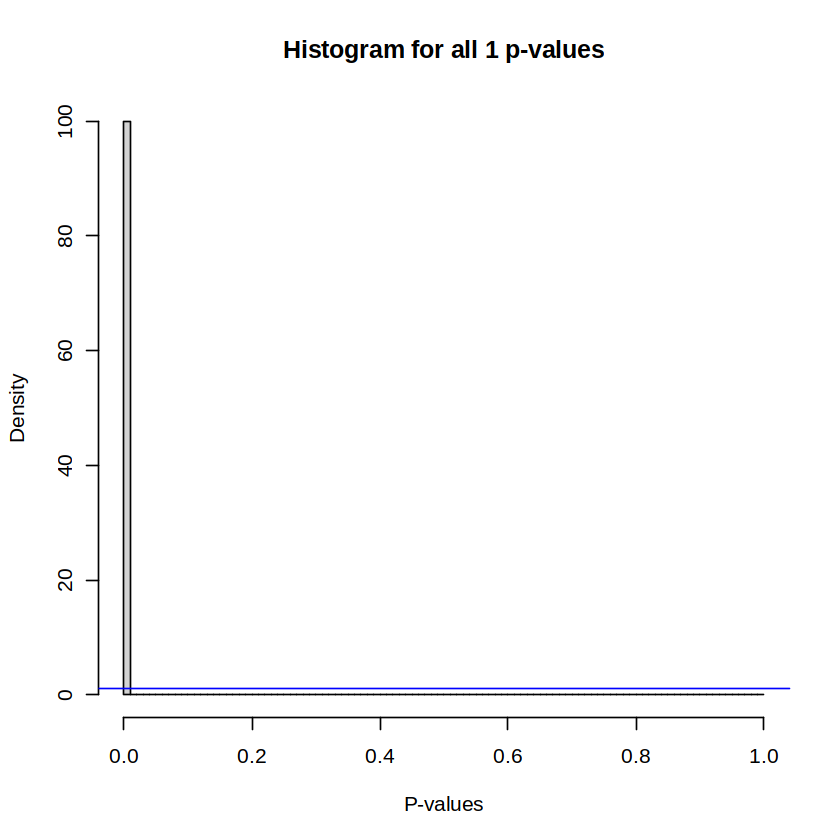

In [15]:
unlink(output_file_name);

## Results:

cat('Analysis done in: ', me$time.in.sec, ' seconds', '\n');
cat('Detected eQTLs:', '\n');
show(me$all$eqtls)

## Plot the histogram of all p-values

plot(me)

In [ ]:
phenotype <- read.csv('./donor_phenotype.csv')
donor_status_mapping <- as.factor(phenotype$Status)
names(donor_status_mapping) <- phenotype$ID
status <- donor_status_mapping[donors]

In [31]:
data = data.frame(cbind(snp = df_snp[1,], openness = df_openness[1,], state = as.character(status)))
data$snp = as.factor(data$snp)
data$openness = as.numeric(data$openness)
data$group = 'rs4655617'
data

,snp,openness,state,group
,<fct>,<dbl>,<chr>,<chr>
V1,0,0.0000000,Pre-T2D,rs4655617
V2,0,0.0000000,Pre-T2D,rs4655617
V3,0,0.0000000,Pre-T2D,rs4655617
V4,0,0.5656431,Pre-T2D,rs4655617
V5,0,0.4846233,Pre-T2D,rs4655617
V6,0,0.0000000,Pre-T2D,rs4655617
V7,0,0.4758393,Pre-T2D,rs4655617
V8,0,0.4610269,Pre-T2D,rs4655617
V9,0,0.5202149,Pre-T2D,rs4655617


png 
  2

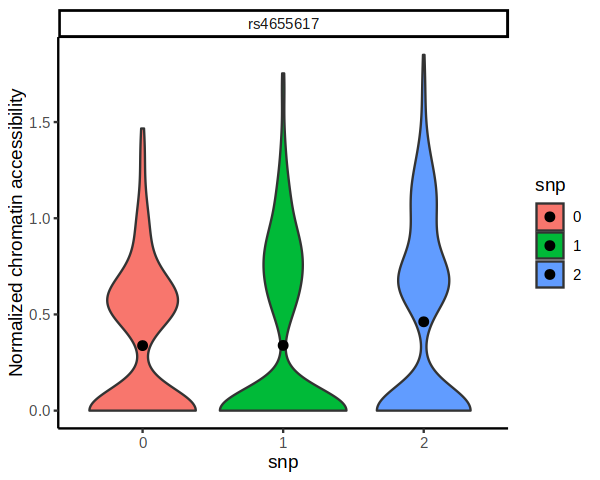

In [34]:
options(repr.plot.width=5, repr.plot.height=4)

p <- ggplot(data, aes(x=snp, y=openness, fill=snp)) +
  geom_violin()+theme_classic()+labs(y = "Normalized chromatin accessibility")+ 
stat_summary(fun.y=mean, geom="point", size=2, color="black")+ facet_wrap(~group, scales = "free_y", ncol = 1)

pdf('/nfs/public/xixi/scRegulate/figures/supp_fig6.2.pdf', width = 5, height = 4)
print(p)
dev.off()
p
#p + facet_wrap(~group, scales = "free_y", ncol = 3)

In [50]:
wilcox.test(data[data$state=='Non-diabetic',]$openness, 
            data[data$state=='T2D',]$openness,
           alternative='less')
wilcox.test(data[data$state=='Non-diabetic',]$openness, 
            data[data$state=='Pre-T2D',]$openness,
           alternative='less')
wilcox.test(data[data$state=='Pre-T2D',]$openness, 
            data[data$state=='T2D',]$openness,
           alternative='less')


	Wilcoxon rank sum test with continuity correction

data:  data[data$state == "Non-diabetic", ]$openness and data[data$state == "T2D", ]$openness
W = 74486, p-value < 2.2e-16
alternative hypothesis: true location shift is less than 0



	Wilcoxon rank sum test with continuity correction

data:  data[data$state == "Non-diabetic", ]$openness and data[data$state == "Pre-T2D", ]$openness
W = 77146, p-value = 9.421e-11
alternative hypothesis: true location shift is less than 0



	Wilcoxon rank sum test with continuity correction

data:  data[data$state == "Pre-T2D", ]$openness and data[data$state == "T2D", ]$openness
W = 109385, p-value = 0.02923
alternative hypothesis: true location shift is less than 0


In [ ]:
data3 <- c()
for (i in 1:nrow(df_expr)){
    df_data <- data.frame(cbind(expr = df_expr[i, ], state = as.character(status), gene = rep(rownames(df_expr)[i], ncol(df_expr))))
    data3 <- rbind(data3, df_data)
}
data3$expr = as.numeric(data3$expr)
data3

png 
  2

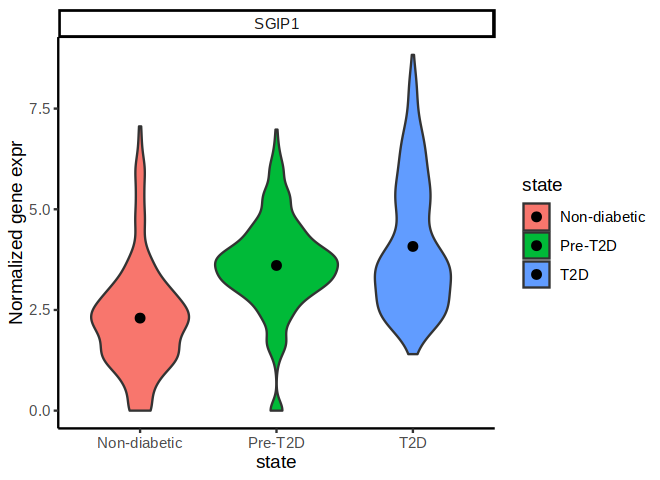

In [71]:
options(repr.plot.width=5.5, repr.plot.height=4)

p <- ggplot(data3, aes(x=state, y=expr, fill=state)) +
  geom_violin()+theme_classic()+labs(y = "Normalized gene expr") + 
stat_summary(fun.y=mean, geom="point", size=2, color="black")+ facet_wrap(~gene, scales = "free_y", ncol = 3)

pdf('/nfs/public/xixi/scRegulate/figures/supp_fig6.3.pdf', width = 5.5, height = 4)
print(p)
dev.off()
p

In [45]:
library(ggpubr)

In [41]:
data2 <- as.data.frame(cbind(openness = df_openness[1,], expr = df_expr[1, ]))
data2

,openness,expr
,<dbl>,<dbl>
V1,0.0000000,3.0186535
V2,0.0000000,2.5168207
V3,0.0000000,1.7663409
V4,0.5656431,2.5951086
V5,0.4846233,1.5824276
V6,0.0000000,1.9816095
V7,0.4758393,2.2828506
V8,0.4610269,2.1751436
V9,0.5202149,1.3862942


In [42]:
data2_filtered <- data2[data2$openness!=0 & data2$expr!=0,]
cor.test(data2$openness, data2$expr, method = 'pearson')
cor.test(data2_filtered$openness, data2_filtered$expr, method = 'pearson')


	Pearson's product-moment correlation

data:  data2$openness and data2$expr
t = 5.3209, df = 1392, p-value = 1.202e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0893448 0.1922635
sample estimates:
      cor 
0.1411856 



	Pearson's product-moment correlation

data:  data2_filtered$openness and data2_filtered$expr
t = 5.2319, df = 650, p-value = 2.267e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1261857 0.2735829
sample estimates:
      cor 
0.2010219 


png 
  2

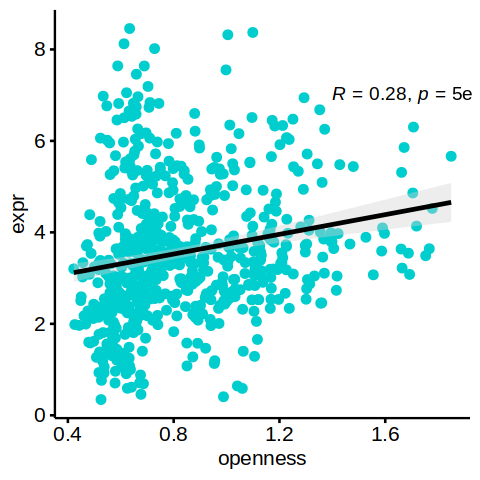

In [70]:
sp <- ggscatter(data2_filtered, x = "openness", y = "expr",
   color = "cyan3",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "black", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + stat_cor(method = "spearman", label.x = 1.4, label.y = 7)
# Add correlation coefficient
pdf('/nfs/public/xixi/scRegulate/figures/supp_fig6.4.pdf', width = 5, height = 5)
print(sp)
dev.off()
sp